In [2]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl 
import matplotlib.pyplot as plt

%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

In [3]:
files = [range(743,756)]
Vs = [np.arange(-60,70,10)]
folder = 31

In [710]:
files = [range(856, 856+21, 1), range(856+21, 856+21*2, 1),]
#          range(315, 315+25, 1), range(315+25, 315+25*2, 1), 
#          range(550, 550+25, 1), range(550+25, 550+25*2, 1), 
#          range(609, 609+12, 1), range(609+12, 609+12*2, 1)]
Vs = [np.arange(-40,65,5), np.arange(60,-45,-5), ]
#       np.arange(-60,65,5), np.arange(60,-65,-5),
#       np.arange(-60,65,5), np.arange(60,-65,-5),
#       np.arange(60,0,-5), np.arange(5,65,5)]

In [41]:
files = [range(727, 727+21, 1), range(727+21, 727+21*2, 1),
         range(685, 685+21, 1), range(685+21, 685+21*2, 1),
         range(643, 643+21, 1), range(643+21, 643+21*2, 1), 
         range(770, 770+21, 1), range(770+21, 770+21*2, 1),
         range(813, 813+21, 1), range(813+21, 813+21*2, 1),
         range(856, 856+21, 1), range(856+21, 856+21*2, 1),]
Vs = [np.arange(-40,65,5), np.arange(60,-45,-5), 
      np.arange(-40,65,5), np.arange(60,-45,-5), 
      np.arange(-40,65,5), np.arange(60,-45,-5), 
      np.arange(-40,65,5), np.arange(60,-45,-5), 
      np.arange(-40,65,5), np.arange(60,-45,-5),
      np.arange(-40,65,5), np.arange(60,-45,-5),]
         

In [116]:
files = [range(747, 747+13, 1), range(747+13, 747+13*2, 1),
         range(773, 773+13, 1), range(773+13, 773+13*2, 1),]
Vs = [np.arange(60,-70,-10), np.arange(-60,70,10), 
      np.arange(60,-70,-10), np.arange(-60,70,10),]

In [6]:
import pims
import pySPM as spm 
import trackpy as tp
import glob
from itertools import chain
from sxmreader import SXMReader

n_range = range(333, 345 +1, 1)

N = len(n_range)
folder = 31
SXM_PATH = ["electromigration_{0}/Image_{1:03}.sxm".format(folder, i) for i in n_range]
frames = SXMReader(SXM_PATH)
molecule_size = 7
min_mass = 2
min_size = 0.5
max_ecc = 0.3
sep = 1.5


base_filename = "electromigration_30_{0:03}-{1:03}".format(n_range[0],n_range[-1])
OUTPUT = "./molecule_density_data/"

#print(frames[0])
    
#plt.imshow(frames[7])

In [7]:
fs = []
for f in files:
    folder = 31
    SXM_PATH = ["electromigration_{0}/Image_{1:03}.sxm".format(folder, i) for i in f]
    print(SXM_PATH)
    frames = SXMReader(SXM_PATH)
    molecule_size = 9
    min_mass = 2
    min_size = 0.5
    max_ecc = 0.3
    sep = 3
    detect_kwargs = {
    'minmass' : 1,
    'maxsize' : 3,
    'separation' : 15,
    }
    f = tp.batch(frames[:], molecule_size, **detect_kwargs)
    #f = tp.batch(frames[:], molecule_size, separation=sep, minmass=min_mass)
    fs.append(f)

Frame 12: 98 features


Frame 12: 98 features
electromigration_31/Image_743.sxm


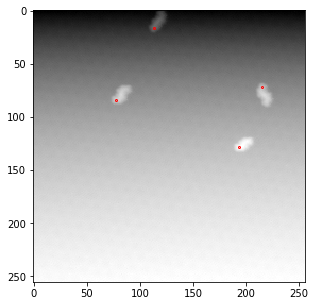

electromigration_31/Image_744.sxm


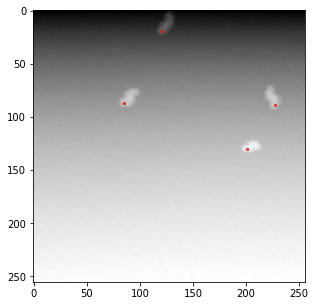

electromigration_31/Image_745.sxm


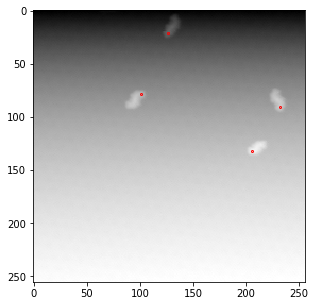

electromigration_31/Image_746.sxm


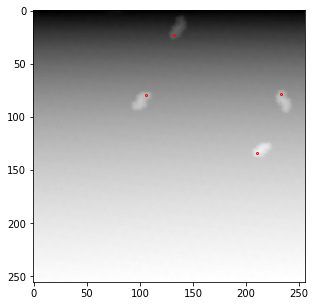

electromigration_31/Image_747.sxm


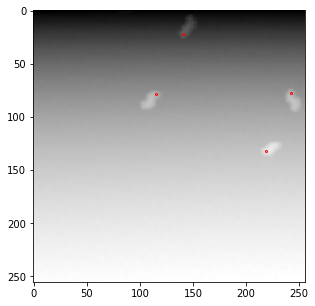

electromigration_31/Image_748.sxm


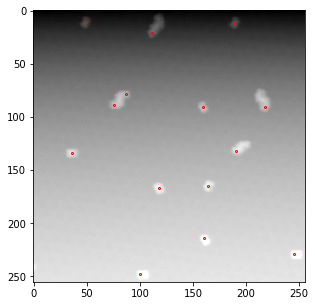

electromigration_31/Image_749.sxm


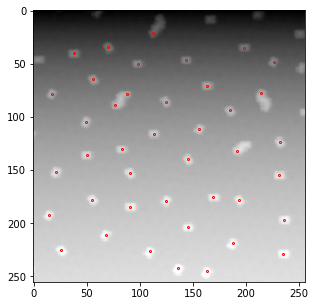

electromigration_31/Image_750.sxm


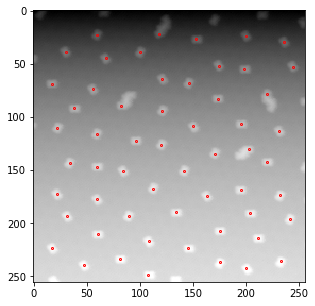

electromigration_31/Image_751.sxm


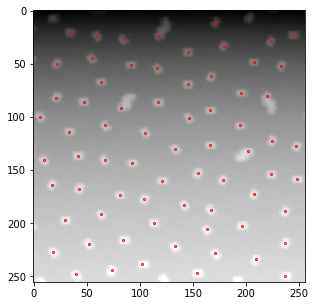

electromigration_31/Image_752.sxm


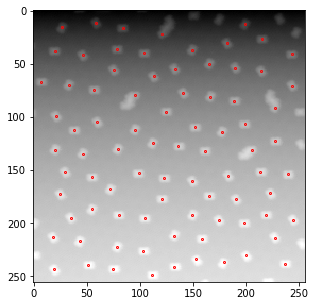

electromigration_31/Image_753.sxm


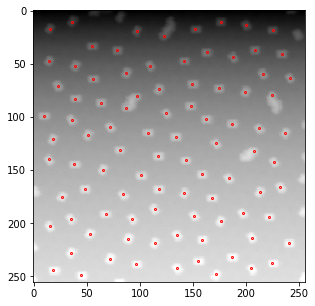

electromigration_31/Image_754.sxm


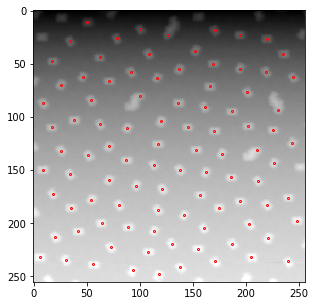

electromigration_31/Image_755.sxm


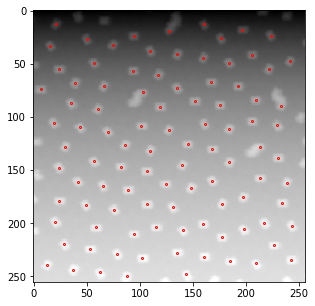

In [8]:
f = tp.batch(frames[:], molecule_size, **detect_kwargs)
#tp.quiet()  # Turn off progress reports for best performance
plt.figure()
#plt.figure(figsize=(10,10))
for i,frame in enumerate(frames):
    print(SXM_PATH[i])
    tp.annotate(f[f['frame']==i], frame, plot_style={'markersize': 1})

In [35]:
SCAN_SIZE = (frames.scan_size['real']['x'] * 1e10)
out = pd.DataFrame()
out['x'] = f.x/256*SCAN_SIZE
out['y'] = f.y/256*SCAN_SIZE
out.to_csv('position_list_30Vg.csv')

In [91]:
len(f2)

0

In [100]:
Vs

[array([ 60,  50,  40,  30,  20,  10,   0, -10, -20, -30, -40, -50, -60]),
 array([-60, -50, -40, -30, -20, -10,   0,  10,  20,  30,  40,  50,  60]),
 array([ 60,  50,  40,  30,  20,  10,   0, -10, -20, -30, -40, -50, -60])]

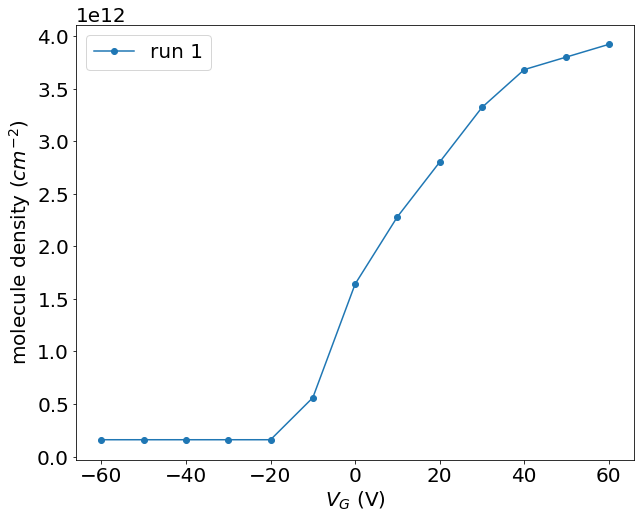

In [9]:
x = np.arange(-60, 70, 10)
SIZE = (frames.scan_size['real']['x'] * 1e2) * (frames.scan_size['real']['y'] * 1e2)
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size':20})
plt.xlabel('$V_G$ (V)')
plt.ylabel('molecule density ($cm^{-2}$)')
i=1
for v, f in zip(Vs, fs):
    N=len(v)
    fplot = f.groupby('frame').size().reindex(range(N), fill_value=0)/SIZE
    plt.plot(v,fplot,'o-', label='run {}'.format(i))
    plt.legend()
    i += 1

ValueError: x and y must have same first dimension, but have shapes (0,) and (13,)

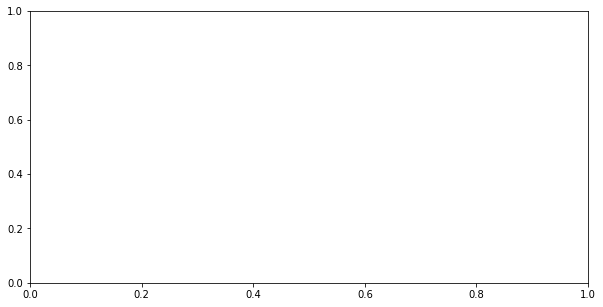

In [93]:
data_out = pd.DataFrame()
x = np.arange(-60, 70, 10)
SIZE = (frames.scan_size['real']['x'] * 1e2) * (frames.scan_size['real']['y'] * 1e2)
f3 = f.groupby('frame').size().reindex(range(N), fill_value=0)[0:13]
i = 0
for v, f in zip(Vs, fs):
    N = len(v)
    if i%2==0:
        f1 = f.groupby('frame').size().reindex(range(N), fill_value=0)
        #data_out['{} nm, fw'.format(100*(i//2+1))] = f1.T
        vavg=v
    else:
        f2 = f.groupby('frame').size().reindex(range(N), fill_value=0)
        f2.iloc[:] = f2.iloc[::-1].values
        #data_out['{} nm, bk'.format(100*(i//2+1))] = f2.T
        favg=(f1+f2[::-1])/2/SIZE
        data_out['{} nm, avg'.format(100*(i//2+1))] = favg
        plt.plot(vavg, favg, '.-',label='{} nm away from chains'.format(100*(i//2+1)))
        #plt.plot(vavg, favg, '.-',label='{}'.format(files[i]))
    i += 1
plt.legend()
plt.xlabel('$V_G (V)$')
plt.ylabel('$n_M (cm^{-2})$')
#data_out.set_index(v[::-1]).to_csv('em{}_{}-{}.csv'.format(folder, n_range[0], n_range[-1]), header=True)

slope: 66742857142.85715 +/- 974268634.4415066
intercept: 191999999999.99927 +/- 40071547733.13533


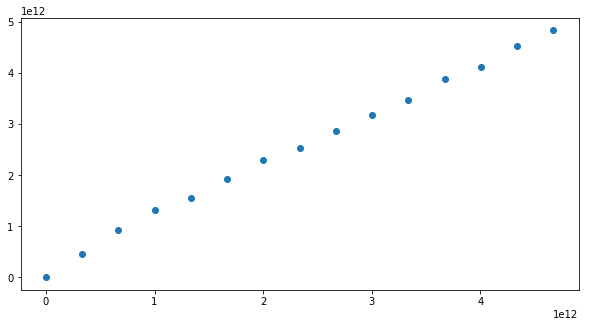

In [749]:
x = vavg[6:] + 10
y = favg[6:]


p, V = np.polyfit(x, y, 1, cov=True)

print("slope: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("intercept: {} +/- {}".format(p[1], np.sqrt(V[1][1])))

plt.plot(x*p[0],y,'o')
#xfit= np.linspace(0,70,100)
#plt.plot(xfit,p[0]*xfit + p[1],'r--')

#xx = np.linspace(-10,60,100)
#plt.plot(xx,p[0]*xx + p[1],'r--')
#EL=np.sqrt(p[1]*np.pi*(6.5*10**-16)**2*(1.1*10**8)**2)
#EL_err = np.sqrt(np.sqrt(V[1][1])*np.pi*(6.5*10**-16)**2*(1.1*10**8)**2)
#print("EL: {} +/- {}".format(EL, EL_err))

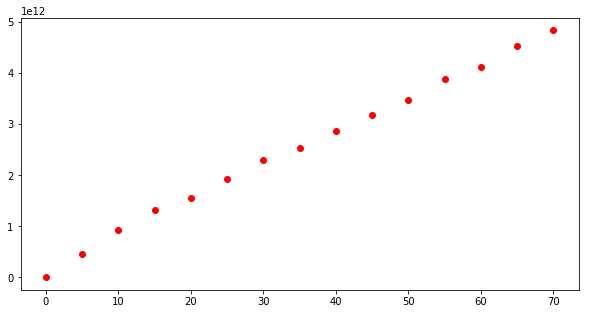

In [742]:
plt.plot(vavg[6:]+10,favg[6:],'ro')

Text(0, 0.5, '$n_M (cm^{-2})$')

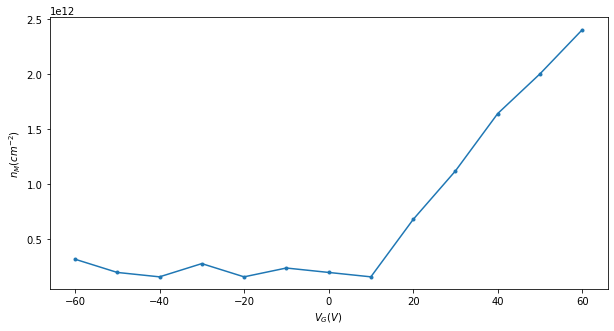

In [40]:
data_out = pd.DataFrame()
x = np.arange(-60, 70, 10)
SIZE = (frames.scan_size['real']['x'] * 1e2) * (frames.scan_size['real']['y'] * 1e2)
f1 = f.groupby('frame').size().reindex(range(N), fill_value=0)
plt.plot(x, f1/SIZE, '.-')
plt.xlabel('$V_G (V)$')
plt.ylabel('$n_M (cm^{-2})$')

In [435]:
f2=f2.append(ff)

In [452]:
f2

frame
12     1
13    14
14    21
15    30
16    36
17    45
18    53
19    59
20    70
21    73
22    84
23    88
dtype: int64

In [438]:
pd.DataFrame(np.transpose([x[::-1],f1/SIZE,f2[::-1]/SIZE, f1,f2[::-1]]),columns=['VG','n_forward','n_backward','N_forward','N_backward']).to_csv('em{}_{}-{}.csv'.format(folder, n_range[0], n_range[-1]), header=True, index=False)

In [405]:
pd.DataFrame(np.transpose([x[::-1],f1/SIZE,f1]),columns=['VG','n_forward','N_forward'])

,VG,n_forward,N_forward
0,-60.0,0.000000e+00,0.0
1,-55.0,0.000000e+00,0.0
2,-50.0,0.000000e+00,0.0
3,-45.0,0.000000e+00,0.0
4,-40.0,0.000000e+00,0.0
5,-35.0,0.000000e+00,0.0
6,-30.0,0.000000e+00,0.0
7,-25.0,0.000000e+00,0.0
8,-20.0,0.000000e+00,0.0
9,-15.0,0.000000e+00,0.0


In [317]:
pd.DataFrame(np.transpose([x, f1, f2])).reset_index().to_csv('em{}_{}-{}.csv'.format(folder, n_range[0], n_range[-1]), header=False, index=False)

In [32]:
f1

frame
0    30
1    33
2    30
3    32
4    27
5    27
6    25
dtype: int64

In [108]:
f1=np.array([30,33,30,32,27,27,25])
f2= np.array([31,29,28,28,27,28,27])

In [100]:
x = np.arange(-60, 80, 20)

In [105]:
f2

array([31, 29, 28, 28, 27, 28, 27])

In [78]:
plt.figure(figsize=(10,8))
plt.plot(x[::1],f2/SIZE/9*16,'o-', label='run1, forward')
plt.plot(x, f1/SIZE/9*16,'o-',label='run2, forward')
plt.plot(x[::-1], (f3)/SIZE,'o-',label='run3, backward')
# plt.plot(x[::-1], f1,'o-',label='em17/909 - 921')
# plt.plot(x[::-1], f2,'o-',label='em17/922 - 934')
# plt.plot(x[::-1], f3,'o-',label='em17/935 - 947')
# plt.plot(x[::-1], f4,'o-',label='em17/948 - 960')

#plt.plot(x, f3,'o-',label='3, up')
#plt.plot(x[:12], f4,'o-',label='4, down')
#plt.plot(x, f5,'o-',label='5, down')
plt.legend()
#plt.plot(x2, g1)
#plt.plot(x2, g2)
#plt.plot(x2, g3)
#plt.plot(x2, g4)
# plt.title(SXM_PATH[0] + " to {}".format(n_range[-1]))
plt.xlabel('Gate Voltage (V)')
plt.ylabel('Molecule density (1/$cm^2$)')
plt.title(base_filename)
plt.savefig(OUTPUT + base_filename+'.png')
print(OUTPUT + base_filename+'.png')

NameError: name 'f2' is not defined

<Figure size 720x576 with 0 Axes>

In [51]:
#from numpy import savetxt
#base_filename = "molecule_density_data/electromigration_13_616-640"
#savetxt(base_filename+'.csv', np.column_stack([x, f1, f2]), delimiter=',')

In [ ]:
range(48)

In [ ]:
N

In [ ]:
f1

In [ ]:
f1+[0,41,49,50,42,30,8,1,1,0,0,0,0]

In [ ]:
times = [0,1,1,5,5,10,10,10,10,30,30,30,50,100,180]
uncounted=[0,41,49,50,42,30,8,1,1,0,0,0,0,0,0]
ctimes = np.cumsum(times)
plt.semilogx(ctimes,(f1+uncounted)/SIZE,'o-')
plt.xlabel('cumulative time (s)')
plt.ylabel('molecule density ($cm^{-2}$)')

In [ ]:
times = range(N)
plt.plot(times,f1,'o-')
plt.xlabel('cumulative time (s)')
plt.ylabel('molecule density ($cm^{-2}$)')

In [ ]:
len(f1)

In [ ]:
times = np.arange(0.5,19,0.5)
ctimes = np.cumsum(times)
plt.plot(ctimes,f1,'o-')
plt.xlabel('cumulative time (s)')
plt.ylabel('molecule density ($cm^{-2}$)')

In [ ]:
f1*SIZE

In [737]:
test.columns

Index(['Unnamed: 0', '100 nm, avg'], dtype='object')

In [728]:
test=pd.read_csv('em26_856-897.csv')

In [748]:
test['Unnamed: 0'][6:]

6    -10
7     -5
8      0
9      5
10    10
11    15
12    20
13    25
14    30
15    35
16    40
17    45
18    50
19    55
20    60
Name: Unnamed: 0, dtype: int64